# Úloha 5
#### V následující úloze uveďte řešení pro ta z následujících tří prostředí, u nichž to dokážete.
### a) SQL relační databáze
### b) Python – pandas
### c) R – volitelně pro data.frame, data.table nebo tidyverse
#### Máme tabulku Cl obsahující pro každého klienta banky mj. jeho id (sloupec clid) a rok narození (sloupec byear).
#### Dále máme tabulku Tr obsahující bankovní transakce klientů, a to se sloupci id klienta (sloupec clid), směr transakce (sloupec dir; znak C v něm znamená příchozí transakci a znak D odchozí) a částku transakce (sloupec amt).
#### Platí, že ke každé transakci v tabulce Tr existuje záznam o klientovi v tabulce Cl, ale někteří klienti nemusejí mít žádné transakce.
#### Vypište příkazy, jejichž výsledkem bude pro každého klienta narozeného před rokem 2000 součet částek u všech jeho příchozích transakcí. Klienti, kteří nemají žádné transakce, budou mít tento součet roven 0.

# 1) SQL ŘEŠENÍ

### SPOJENÍ S WORKBENCH

In [2]:
import mysql.connector

mydb = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Doktorand940610Rr")

print(mydb)

### INICIALIZACE CURSOR CLASS 

In [3]:
cursor = mydb.cursor()

### TVORBA DATABÁZE A TABULEK

In [4]:
cursor.execute("CREATE DATABASE profinit")

In [25]:
# Create table Clients
cursor.execute("USE profinit")
cursor.execute("CREATE TABLE Clients (client_id INT AUTO_INCREMENT PRIMARY KEY, name VARCHAR(255), birthday_year INT)")

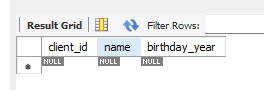

In [8]:
# Create table Transactions
cursor.execute("CREATE TABLE Transactions (transaction_id INT AUTO_INCREMENT PRIMARY KEY, client_id INT, amount DECIMAL(10,2), transaction_date DATE)")

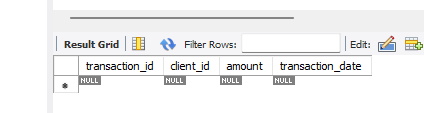

### NAPLNĚNÍ TABULEK DATY

In [26]:
# Fill tables Clients and Transactions with some data
cursor.execute("INSERT INTO clients (name, birthday_year) VALUES ('Jan Novak', 1980), ('Jana Svobodová', 2001), ('Pavel Novak', 1994), ('Petr Novak', 2002), ('Petra Dubová', 1999), ('Jana Nováková', 1985), ('Pavel Novotný', 1970), ('Jan Novák', 1990), ('Pavel Fiala', 1995), ('Jana Novotná', 2000), ('Petr Svoboda', 1981), ('Pavel Svoboda', 1982), ('Jan Novotný', 1976), ('Petr Novák', 1991), ('Jana Novotná', 1996), ('Pavel Novák', 1997), ('Petr Novotný', 1998), ('Petra Nováková', 1992), ('Filip Dostál', 1993), ('Tomáš Smrž', 2001)")
mydb.commit()


In [27]:
cursor.execute("INSERT INTO transactions (client_id, amount, transaction_date) VALUES (1, 1000, '2020-01-01'), (1, 2000, '2020-01-02'), (4, 3000, '2020-01-03'), (4, 4000, '2020-01-04'), (4, 5000, '2020-01-05'), (3, 6000, '2020-01-06'), (9, 7000, '2020-01-07'), (10, 8000, '2020-01-08'), (9, 9000, '2020-01-09'), (10, 10000, '2020-01-10'), (14, 11000, '2020-01-11'), (14, 12000, '2020-01-12'), (12, 13000, '2020-01-13'), (12, 14000, '2020-01-14'), (12, 15000, '2020-01-15'), (19, 16000, '2020-01-16'), (20, 17000, '2020-01-17'), (20, 18000, '2020-01-18'), (20, 19000, '2020-01-19'), (20, 20000, '2020-01-20')")
mydb.commit()

In [28]:
# Add new column to table Transactions
cursor.execute("ALTER TABLE Transactions ADD COLUMN direction CHAR(1)")
cursor.execute("UPDATE Transactions SET direction = CASE WHEN RAND() < 0.5 THEN 'C' ELSE 'D' END")
mydb.commit()

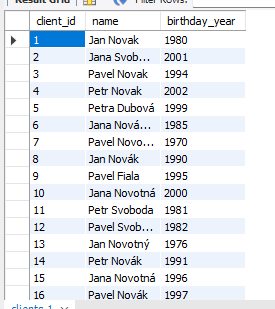
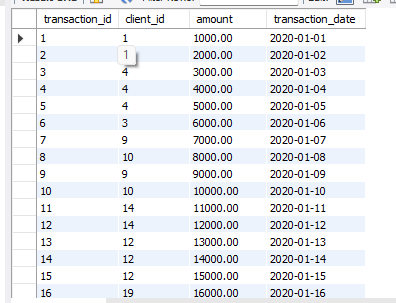
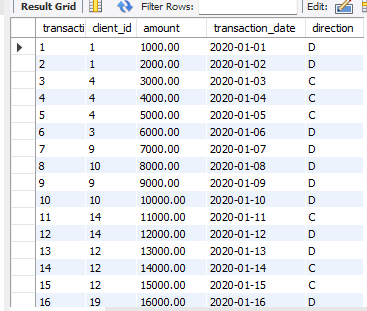

### QUERRY A

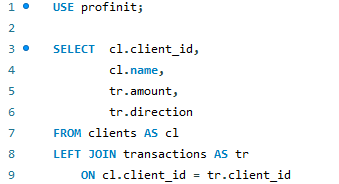
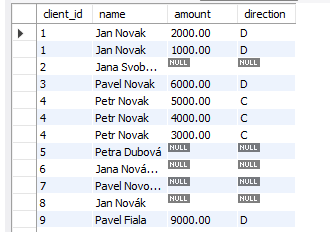


### QUERRY B

- 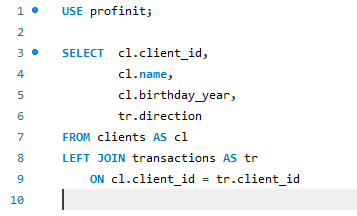
- 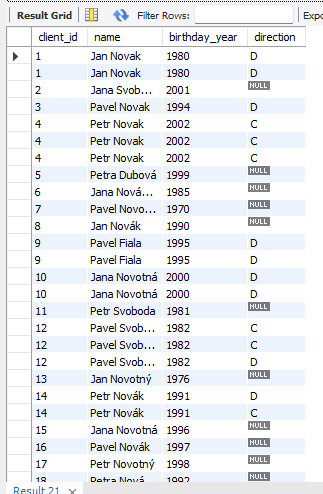

### QUERRY C

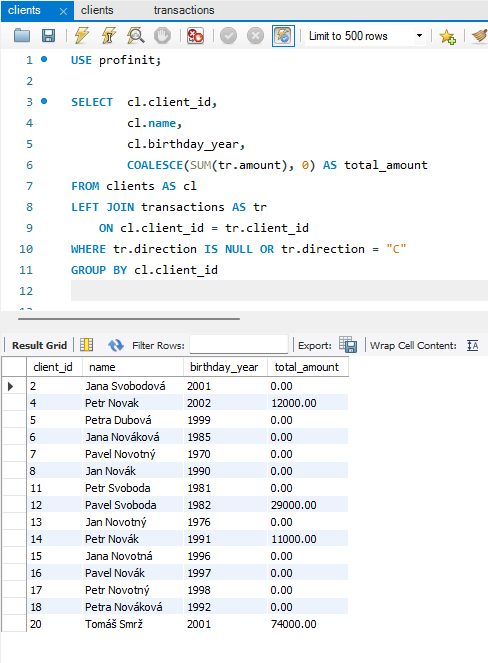 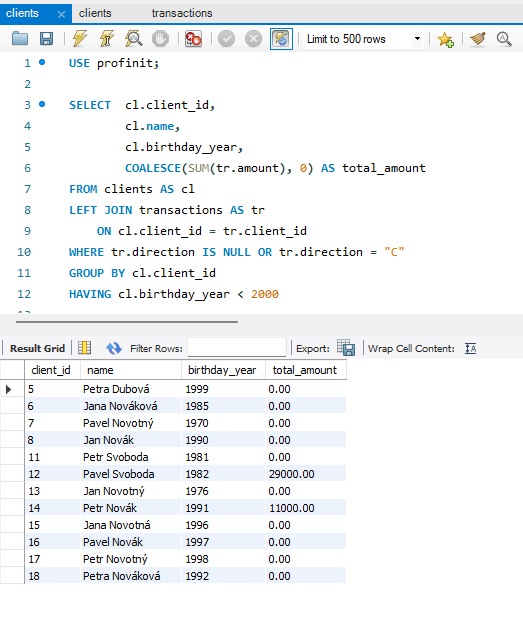

# 2) PANDAS ŘEŠENÍ

In [3]:
import pandas as pd
import numpy as np

In [4]:
# Načtení dat
clients = pd.read_csv("./data/clients.csv")
transactions = pd.read_csv("./data/transactions.csv")

# Propojení dat pomocí merge
merged_df = clients.merge(transactions, on='client_id', how='outer')
merged_df

,client_id,name,birthday_year,transaction_id,amount,transaction_date,direction
0,1,Jan Novak,1980,1.0,1000.0,2020-01-01,D
1,1,Jan Novak,1980,2.0,2000.0,2020-01-02,D
2,2,Jana Svobodová,2001,NaN,NaN,NaN,NaN
3,3,Pavel Novak,1994,6.0,6000.0,2020-01-06,D
4,4,Petr Novak,2002,3.0,3000.0,2020-01-03,C
5,4,Petr Novak,2002,4.0,4000.0,2020-01-04,C
6,4,Petr Novak,2002,5.0,5000.0,2020-01-05,C
7,5,Petra Dubová,1999,NaN,NaN,NaN,NaN
8,6,Jana Nováková,1985,NaN,NaN,NaN,NaN
9,7,Pavel Novotný,1970,NaN,NaN,NaN,NaN


In [5]:
# Group dat podle client_id a amount SUM 
grouped_df = merged_df[(merged_df["direction"] == 'C') | (merged_df["direction"].isnull())].groupby('client_id').agg({'birthday_year':'first', 
                                                                                                                      'name':'first', 
                                                                                                                      'amount':'sum', 
                                                                                                                      'direction':'first'}).reset_index()

grouped_df

,client_id,birthday_year,name,amount,direction
0,2,2001,Jana Svobodová,0.0,None
1,4,2002,Petr Novak,12000.0,C
2,5,1999,Petra Dubová,0.0,None
3,6,1985,Jana Nováková,0.0,None
4,7,1970,Pavel Novotný,0.0,None
5,8,1990,Jan Novák,0.0,None
6,11,1981,Petr Svoboda,0.0,None
7,12,1982,Pavel Svoboda,29000.0,C
8,13,1976,Jan Novotný,0.0,None
9,14,1991,Petr Novák,11000.0,C


In [6]:
# Filter data by birthday year 
filtered_df = grouped_df[(grouped_df['birthday_year'] < 2000) & (grouped_df['direction'].isin(['C', None]))]
filtered_df

,client_id,birthday_year,name,amount,direction
2,5,1999,Petra Dubová,0.0,None
3,6,1985,Jana Nováková,0.0,None
4,7,1970,Pavel Novotný,0.0,None
5,8,1990,Jan Novák,0.0,None
6,11,1981,Petr Svoboda,0.0,None
7,12,1982,Pavel Svoboda,29000.0,C
8,13,1976,Jan Novotný,0.0,None
9,14,1991,Petr Novák,11000.0,C
10,15,1996,Jana Novotná,0.0,None
11,16,1997,Pavel Novák,0.0,None
